In [261]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

In [262]:
import to_upward

In [263]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [264]:
import datetime as dt
end_03 = dt.datetime(2023,3,1).strftime("%Y%m%d")
start_03 = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220909 20230909


In [265]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [266]:
stocks = recommendation["Name"].to_list()

In [267]:
stocks

['삼성전자',
 'SK하이닉스',
 'POSCO홀딩스',
 'LG화학',
 '현대차',
 '기아',
 'LG전자',
 'HMM',
 'LG이노텍',
 '키움증권',
 '효성첨단소재',
 '두산',
 '효성티앤씨']

In [268]:
def get_close(data,start,end):
    tmp = pd.DataFrame()
    for n in stocks:
        tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
    return tmp

In [269]:
before_data = get_close(data,start_03,end_03)
before_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
2022-09-14,56800,93000,239500,663000,198500,80300,94000,20750,348000,84600,418500,71300,303500
2022-09-15,56000,92000,235000,658000,198000,80000,92000,21050,344000,84300,424000,80400,308000
2022-09-16,56200,91200,230500,635000,201000,81100,90600,20600,332500,82900,409000,84100,306500
2022-09-19,56400,90000,231000,635000,201500,80800,90400,19850,334000,81900,395000,76100,298000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,61100,89100,332000,666000,174200,74500,111100,21950,286000,103600,417500,85600,467000
2023-02-23,62000,92700,331500,668000,176200,76400,114700,22800,290500,107100,426500,91100,470000
2023-02-24,61300,91000,322000,669000,173900,75300,113400,23050,283000,106100,417500,90400,461500


In [270]:
now_data = get_close(data,start,end)
now_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
2022-09-14,56800,93000,239500,663000,198500,80300,94000,20750,348000,84600,418500,71300,303500
2022-09-15,56000,92000,235000,658000,198000,80000,92000,21050,344000,84300,424000,80400,308000
2022-09-16,56200,91200,230500,635000,201000,81100,90600,20600,332500,82900,409000,84100,306500
2022-09-19,56400,90000,231000,635000,201500,80800,90400,19850,334000,81900,395000,76100,298000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04,71200,119200,590000,586000,187300,80000,102500,16800,269000,102900,462500,112100,369000
2023-09-05,70700,119400,597000,592000,186600,79100,102200,16730,272000,100100,464500,112000,367500
2023-09-06,70000,118200,580000,585000,186700,78900,100500,16580,269000,98400,451500,108000,361500


In [271]:
kospi200 = stock.get_index_ohlcv_by_date(start_03, end, "1028")['종가']
display(kospi200)

날짜
2022-09-13    318.56
2022-09-14    312.74
2022-09-15    310.63
2022-09-16    308.69
2022-09-19    306.49
               ...  
2023-09-04    341.02
2023-09-05    340.29
2023-09-06    337.85
2023-09-07    336.74
2023-09-08    336.40
Name: 종가, Length: 248, dtype: float64

In [272]:
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]

In [273]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]
rf = 0.0325
# 개별 shape 말고 고객에게 제시하는 주식 중 고객이 선택한 주식과 상관계수가 낮은 기업으로 포트폴리오를 구성해주는 것은 어떨까?

In [274]:
def get_portfolio(stocks,annual_ret,annual_cov):
  port_ret = []
  port_risk = []
  port_weights = []
  shape_ratio = []

  for i in range(30000):

      weights = np.random.random(len(stocks))
      weights /= np.sum(weights)


      returns = np.dot(weights, annual_ret)

      risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

      port_ret.append(returns)
      port_risk.append(risk)
      port_weights.append(weights)
      shape_ratio.append(returns/risk)

  portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
  for j, s in enumerate(stocks):
      portfolio[s] = [weight[j] for weight in port_weights]

  df = pd.DataFrame(portfolio)

  max_shape = df.loc[df['Shape'] == df['Shape'].max()]
  min_risk = df.loc[df['Risk'] == df['Risk'].min()]
  tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

  best_ret = tmp2.loc[0,'Returns']
  for i in range(tmp2.shape[0]):
    if tmp2.loc[i,'Returns']<best_ret:
      tmp2.drop(index=i,inplace=True)
    else:
      best_ret = tmp2.loc[i,'Returns']
  return max_shape,min_risk,tmp2,df

In [286]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks,annual_ret,annual_cov)

In [276]:
def show_CAPM(df, tmp2, max_shape, min_risk, rf=0.0325):
    df.plot.scatter(x='Risk', y='Returns', c='Shape', cmap='viridis', edgecolors='k', figsize=(10,8), grid=True)
    plt.plot(tmp2['Risk'], tmp2['Returns'], label='Efficient Frontier', linewidth=5,color='red')
    plt.scatter(max_shape['Risk'], max_shape['Returns'], label='Max_Shape', marker='*',s=500)
    plt.scatter(min_risk['Risk'], min_risk['Returns'], label='Min_risk', marker='*', s=500)
    plt.plot([0, max_shape['Risk'].iloc[0], 0.5], [rf, max_shape['Returns'].iloc[0], (max_shape['Returns'].iloc[0] - rf) / max_shape['Risk'].iloc[0] * 0.5 + rf], label='New EF', linewidth=2,color='green')
    plt.xlabel('Risk')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier Graph')
    plt.legend()
    plt.show()

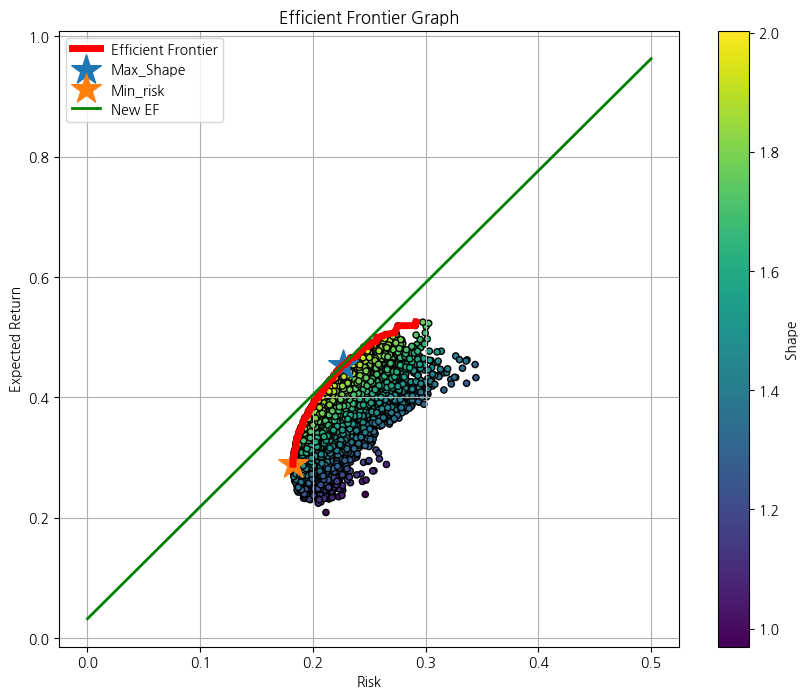

In [277]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.0325)

In [297]:
def show_portfolio(max_shape):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import sympy
    exp_ret = float(input("원하는 기대수익률은 얼마인가?"))/100
    w = sympy.Symbol('w')

    equation = w*0.02 + (1-w)*max_shape['Returns'].values[0] - exp_ret

    solution = sympy.solve(equation, w)
    solution = float(solution[0])
    if solution < 0 :
        print(f"차입 비중 : {-solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
    else : 
        print(f"채권의 비중 : {solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
        
    if solution >= 0:

        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>기대수익을 위한 포트폴리오<br><sup>자기자본의 {solution*100:0.4}%만큼 채권투자</sup>"))


        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]),
            labels=list(max_shape.columns[-5:]),
            domain=dict(x=[0, 0.5]),
            name="기존 포트폴리오"),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]* (1-float(solution)))+[float(solution)] ,
            labels=list(max_shape.columns[-5:]) + ['채권'],
            domain=dict(x=[0.5, 1.0]),
            name="기대수익 포트폴리오"),
            row=1, col=2)

        fig.show()

    else:
        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>투자금 비중</b><br><sup>자기자본의 {-solution*100:0.4}%만큼 차입</sup>"))


        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]),
            labels=list(max_shape.columns[-5:]),
            domain=dict(x=[0, 0.5])),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=[1/(1-solution),1-(1/(1-solution))] ,
            labels=['자기자본','차입금'],
            domain=dict(x=[0.5, 1.0])),
            row=1, col=2)

        fig.show()

In [298]:
show_portfolio(max_shape)

채권의 비중 : 0.5851155576611738
이 경우 Risk : 0.09412071762987023


In [293]:
def geometric_brownian_motion(tmp,S0, T=100, dt=1/100):
    """
    S0: 초기값
    mu: 평균
    sigma: 표준 편차
    T: 시뮬레이션 시간
    dt: 시간 간격
    """

    # Brownian motion
    W = np.random.normal(0, 1, (T, 1))

    daily_returns = tmp.pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return =((1 + mean_return) ** T) - 1

    # 변동성 계산
    mu = annual_return/T
    sigma = daily_returns.std()
    
    X = np.zeros((T, 1))
    X[0] = S0
    for t in range(1, T):
        X[t] = X[t - 1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * W[t])

    return X
    
def monte_sim(sim_num,tmp,stocks,stock_money,day=100):
    sim_num = sim_num
    balance_df = pd.DataFrame(np.zeros((sim_num,day)))
    for i in range(len(stocks)):
        X = []
        for k in range(sim_num):
            X.append(geometric_brownian_motion(tmp[stocks[i]],stock_money[stocks[i]].iloc[0]))
        balance_df += pd.DataFrame(np.array(X).reshape(sim_num,day))
    return balance_df.T

In [294]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,효성티앤씨,POSCO홀딩스,두산,키움증권,LG전자,채권
10547,159092.687652,144332.022515,101915.073087,2511.145486,7033.513598,585115.557661


In [295]:
sim_num = 1000
balance_df = monte_sim(sim_num,before_data,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,...,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339,414884.442339
1,420731.903170,408747.311126,411979.105995,411663.804316,415796.687629,426172.255756,416026.545362,404909.308699,412786.821206,424608.112593,...,423926.794323,396574.527135,415867.120380,418949.119349,410229.686252,424138.124951,409174.737022,412556.577039,410998.934345,422538.137533
2,421053.192929,419274.025720,408717.713706,410616.307139,411627.760699,434293.938748,427292.884476,406745.369386,417160.614896,427639.592055,...,442681.514390,404143.918273,422136.692019,432724.667038,414068.517582,425402.427927,410736.544928,409266.044597,414646.149433,423239.600865
3,427208.408532,414004.016341,404731.979022,412181.390970,409629.827652,422436.763660,433837.727089,410516.875741,422395.072195,423987.839138,...,438179.163861,415896.188212,423002.861784,439378.532306,408465.745024,417456.026085,404343.757327,412494.339365,419326.310887,429971.726400
4,420508.051338,409094.419375,410039.765896,422863.259039,409077.383754,416303.915525,431299.146210,411931.044016,428510.261169,420447.418626,...,429771.200202,401993.215479,437866.068973,440035.032694,402676.958932,405660.786210,402092.333774,420653.537744,411164.260002,427065.900576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,416026.754430,510894.317612,363443.099985,390972.085229,426317.380664,311509.038310,512619.054959,331087.180386,363078.445570,432027.957803,...,484954.380243,486544.338378,462816.739937,465266.405455,361404.986171,294198.391678,456238.839618,434389.787671,418968.541464,492611.829741
96,411343.691455,497051.422560,366002.737353,388385.680588,419223.457508,326134.557551,509666.102844,332489.748907,365988.982774,430039.083282,...,487142.705404,465085.834000,472324.276950,462304.878944,358408.481422,287879.091327,461386.838332,418781.425684,427883.306520,500386.855858
97,411230.763043,476572.542487,355313.336872,381129.792981,422462.881512,327835.150857,515710.706145,330995.959906,372748.470205,427982.183781,...,492667.521048,479679.871917,482680.291022,468777.688453,371725.434271,288751.286961,464612.754473,421509.032508,434423.185975,508145.868270
98,422363.361709,478354.684982,360701.558981,385596.269904,418311.474453,332157.286050,528798.088150,324075.087160,379992.688048,427578.874978,...,498982.088911,479144.833800,479890.282443,458604.135055,370052.560928,290765.004604,473451.943525,416809.293531,432567.581954,506092.116095


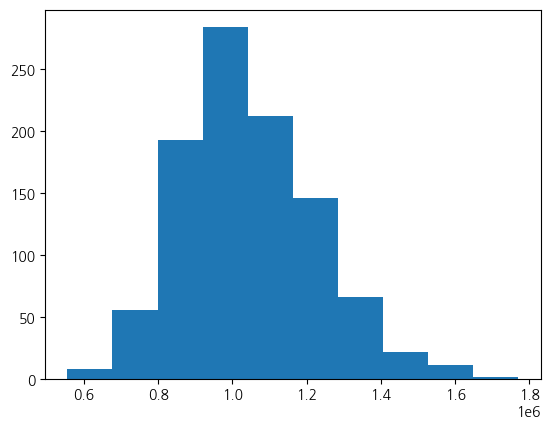

In [34]:
plt.hist(balance_df.iloc[99])
plt.show()

In [189]:
import plotly.express as px
def get_simret(balance_df,balance):
    tmp3 = pd.DataFrame()
    for i in [0.9,0.75,0.5,0.25,0.1]:
        lst = []
        idx = balance_df.T[balance_df.iloc[-1] >= balance_df.iloc[-1].quantile(i)][99].sort_values().index[0]
        for k in range(19,100,20):
            lst.append((balance_df.T.iloc[idx].iloc[k]-balance)/balance*100)
        tmp3[f'{100-i*100}%'] = lst

    tmp3.index=[f"{i}month" for i in range(1,6)]
    tmp3.columns =['호황','상승','평년','하락','불황']
    return tmp3

In [190]:
sim_data = get_simret(balance_df,balance)
display(sim_data)
display(px.line(sim_data))

,호황,상승,평년,하락,불황
1month,-1.641340,1.144656,4.747192,0.652693,-10.844354
2month,12.736005,-1.409149,4.294289,-7.106999,-9.365906
3month,22.800953,9.552620,-2.854304,-5.576260,-18.437165
4month,36.152138,4.216892,-5.210321,-6.144932,-17.286872
5month,31.586510,15.983879,2.722372,-8.509064,-18.026757


In [191]:
future_data = now_data[(now_data.index >before_data.index.max())&(now_data.index < dt.datetime(2023,8,2))]
future_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2023-03-02,60800,88100,337000,678000,178500,77800,111400,22450,271500,103700,416000,99700,463000
2023-03-03,60500,87300,332000,703000,176100,78200,110800,22450,270500,101200,442000,101500,465000
2023-03-06,61500,89700,329500,726000,177500,78500,114500,22050,281500,100100,442500,105400,453500
2023-03-07,60700,88900,335000,740000,175100,77600,114400,21500,279000,99300,438000,106500,448500
2023-03-08,60300,86800,329000,715000,174900,78900,117500,21100,273500,98700,424500,104600,434000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,69800,113000,630000,728000,198700,82600,116300,17270,271500,92500,451000,85800,337500
2023-07-27,71700,124000,594000,658000,197800,83100,117500,17480,269500,98500,429500,86700,340500
2023-07-28,70600,128000,619000,650000,196800,84200,110600,17610,266500,98200,435000,87800,334500


In [192]:
future_data = future_data[stocks].groupby(future_data.index.to_period('M')).first()
future_data

,효성티앤씨,POSCO홀딩스,두산,키움증권,LG전자
날짜,,,,,
2023-03,463000,337000,99700,103700,111400
2023-04,438000,392000,96300,101500,113800
2023-05,412500,382000,94300,91100,109500
2023-06,379000,361000,97600,93500,123000
2023-07,380000,402000,90800,89700,127100
2023-08,346000,621000,116300,103900,109200


In [193]:
future_data = (future_data/future_data.iloc[0]-1).drop(index=future_data.index[0])

In [194]:
port_weigth = max_shape[max_shape.columns[3:]].values
port_weigth

array([[0.40528539, 0.35137239, 0.2089782 , 0.01127749, 0.02308653]])

In [195]:
(future_data*port_weigth).sum(axis=1)

날짜
2023-04    0.028593
2023-05   -0.010369
2023-06   -0.051613
2023-07   -0.021806
2023-08    0.228057
Freq: M, dtype: float64

In [196]:
f_kospi =kospi200[(kospi200.index >before_data.index.max())&(kospi200.index < dt.datetime(2023,8,2))]
f_kospi

날짜
2023-03-02    316.26
2023-03-03    316.36
2023-03-06    320.94
2023-03-07    319.80
2023-03-08    315.38
               ...  
2023-07-26    340.56
2023-07-27    344.76
2023-07-28    344.03
2023-07-31    345.62
2023-08-01    351.00
Name: 종가, Length: 105, dtype: float64

In [197]:
f_kospi = f_kospi.groupby(f_kospi.index.to_period('M')).first()
f_kospi

날짜
2023-03    316.26
2023-04    320.38
2023-05    329.09
2023-06    338.08
2023-07    343.08
2023-08    351.00
Freq: M, Name: 종가, dtype: float64

In [198]:
f_kospi = (f_kospi/f_kospi.iloc[0]-1).drop(index=f_kospi.index[0])
f_kospi

날짜
2023-04    0.013027
2023-05    0.040568
2023-06    0.068994
2023-07    0.084804
2023-08    0.109846
Freq: M, Name: 종가, dtype: float64

In [199]:
sim_data['real'] = ((future_data*port_weigth).sum(axis=1)*100).to_list()
sim_data['KOSPI'] = (f_kospi*100).to_list()
sim_data

,호황,상승,평년,하락,불황,real,KOSPI
1month,-1.641340,1.144656,4.747192,0.652693,-10.844354,2.859347,1.302726
2month,12.736005,-1.409149,4.294289,-7.106999,-9.365906,-1.036863,4.056789
3month,22.800953,9.552620,-2.854304,-5.576260,-18.437165,-5.161257,6.899387
4month,36.152138,4.216892,-5.210321,-6.144932,-17.286872,-2.180550,8.480364
5month,31.586510,15.983879,2.722372,-8.509064,-18.026757,22.805710,10.984633


In [200]:
px.line(sim_data)

In [247]:
import plotly.express as px
def get_simret(balance_df,balance,now_data=None,kospi200=None):
    tmp3 = pd.DataFrame()
    for i in [0.9,0.75,0.5,0.25,0.1]:
        lst = []
        idx = balance_df.T[balance_df.iloc[-1] >= balance_df.iloc[-1].quantile(i)][99].sort_values().index[0]
        for k in range(19,100,20):
            lst.append((balance_df.T.iloc[idx].iloc[k]-balance)/balance*100)
        tmp3[f'{100-i*100}%'] = lst

    tmp3.index=[f"{i}month" for i in range(1,6)]
    tmp3.columns =['호황','상승','평년','하락','불황']
    if now_data is not None:
        future_data = now_data[(now_data.index >before_data.index.max())&(now_data.index < dt.datetime(2023,8,2))]
        future_data = future_data[stocks].groupby(future_data.index.to_period('M')).first()
        future_data = (future_data/future_data.iloc[0]-1).drop(index=future_data.index[0])
        tmp3['real'] = ((future_data*port_weigth).sum(axis=1)*100).to_list()
    
    if kospi200 is not None:
        f_kospi =kospi200[(kospi200.index >before_data.index.max())&(kospi200.index < dt.datetime(2023,8,2))]
        f_kospi = f_kospi.groupby(f_kospi.index.to_period('M')).first()
        f_kospi = (f_kospi/f_kospi.iloc[0]-1).drop(index=f_kospi.index[0])
        tmp3['KOSPI'] = (f_kospi*100).to_list()

    return tmp3

In [296]:
sim_data = get_simret(balance_df,balance,now_data,kospi200)
display(sim_data)
display(px.line(sim_data))

yes


,호황,상승,평년,하락,불황,real,KOSPI
1month,-58.346947,-60.740333,-56.223369,-59.554177,-65.548832,2.859347,1.302726
2month,-57.947227,-59.958949,-57.539653,-65.856244,-64.751332,-1.036863,4.056789
3month,-47.667575,-55.832105,-56.719702,-64.067251,-67.832025,-5.161257,6.899387
4month,-39.134034,-57.530380,-58.935447,-65.791293,-63.693365,-2.180550,8.480364
5month,-47.019982,-51.890726,-57.435522,-62.412660,-66.066099,22.805710,10.984633


지난 3월~ 8월은 상승장이었습니다. 따라서 시뮬레이션 결과인 상승장의 흐름을 많이 따라간 것을 알 수 있습니다.
따라서 향후 저희가 제시하는 포트폴리오를 보시고 시황에 맞게 대응하시면 될 것 같습니다.

In [212]:
stocks = recommendation["Name"].to_list()

In [213]:
daily_ret = now_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**now_data[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * now_data[stocks].shape[0]

In [214]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]
rf = 0.0325

In [215]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks,annual_ret,annual_cov)

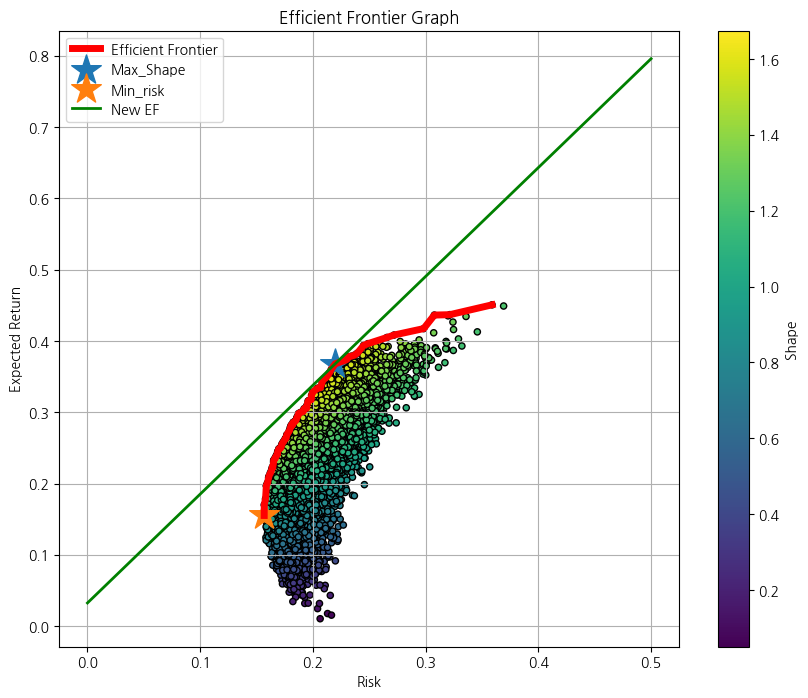

In [216]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.0325)

In [218]:
show_portfolio(max_shape)

채권의 비중 : 0.4825874337145926
이 경우 Risk : 0.11366757604639419


In [219]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance

sim_num = 1000
balance_df = monte_sim(sim_num,before_data,stocks,stock_money)


In [221]:
sim_data2 = get_simret(balance_df,balance,now_data=None,kospi200=None)
display(sim_data2)
display(px.line(sim_data2))

,호황,상승,평년,하락,불황
1month,-0.646084,-3.068687,4.469793,-3.163562,-1.917094
2month,9.424559,11.137900,17.349742,-10.671046,-4.531681
3month,20.421699,28.612093,19.564644,-4.491409,-9.481919
4month,24.393159,34.177299,15.759683,-10.940709,-17.801942
5month,31.349453,18.527167,4.810414,-8.742658,-17.886270
